In [1]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read



from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-09-01 20:35:37,153][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-09-01 20:35:38,385][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [2]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\mice\\cohort3"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/mice/cohort3"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R511", "R512", "R513"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [3]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

# just today
# date_min=datetime.today().strftime("%Y-%m-%d")
date = pd.Timestamp(2023, 8, 28).date()
condition = (trials_df["animal_id"] == "R511") & (trials_df["date"] == date)
trials_df = trials_df[~condition]

fetched 20 sessions for R511 between 2023-08-13 and 2023-09-01
fetched 20 sessions for R512 between 2023-08-13 and 2023-09-01
fetched 20 sessions for R513 between 2023-08-13 and 2023-09-01


In [4]:
# PLOT TRIALS DATAa
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R513_2023-09-01_day_summary
['s_a', 'delay', 's_b', 'post', 'go']


In [5]:
date_max_dt = trials_df["date"].max()
trials_df.query("date == @today").groupby("animal_id").give_type_imp.unique()

animal_id
R511    [light, water_and_light]
R512               [none, light]
R513               [light, none]
Name: give_type_imp, dtype: object

In [6]:
trials_df.query("date == @today").groupby("animal_id").water_delivered.sum() / 1000

animal_id
R511    0.724
R512    0.340
R513    0.201
Name: water_delivered, dtype: float64

In [7]:
trials_df.query("date == @today").groupby("animal_id").stage.max()

animal_id
R511     2.0
R512    10.0
R513    10.0
Name: stage, dtype: float64

In [8]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [9]:
trials_df.query("date == @today").groupby("animal_id").stimulus_dur.max()

animal_id
R511    0.001
R512    0.300
R513    0.300
Name: stimulus_dur, dtype: float64

In [10]:
trials_df.query("date == @today").groupby("animal_id").stimulus_dur.describe()

,count,mean,std,min,25%,50%,75%,max
animal_id,,,,,,,,
R511,60.0,0.001,0.000000e+00,0.001,0.001,0.001,0.001,0.001
R512,55.0,0.300,5.602279e-17,0.300,0.300,0.300,0.300,0.300
R513,99.0,0.300,5.579365e-17,0.300,0.300,0.300,0.300,0.300


In [11]:
trials_df.query("date == @today").groupby("animal_id").volume_multiplier.mean()

animal_id
R511    1.0
R512    1.0
R513    1.0
Name: volume_multiplier, dtype: float64

In [12]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )

f_name = "R51s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)

days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

partial dj load with new date min 2023-08-12 -> 2023-09-01
Returning appended df with entries between 2023-08-12 and 2023-09-01
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R51s_days_df.csv


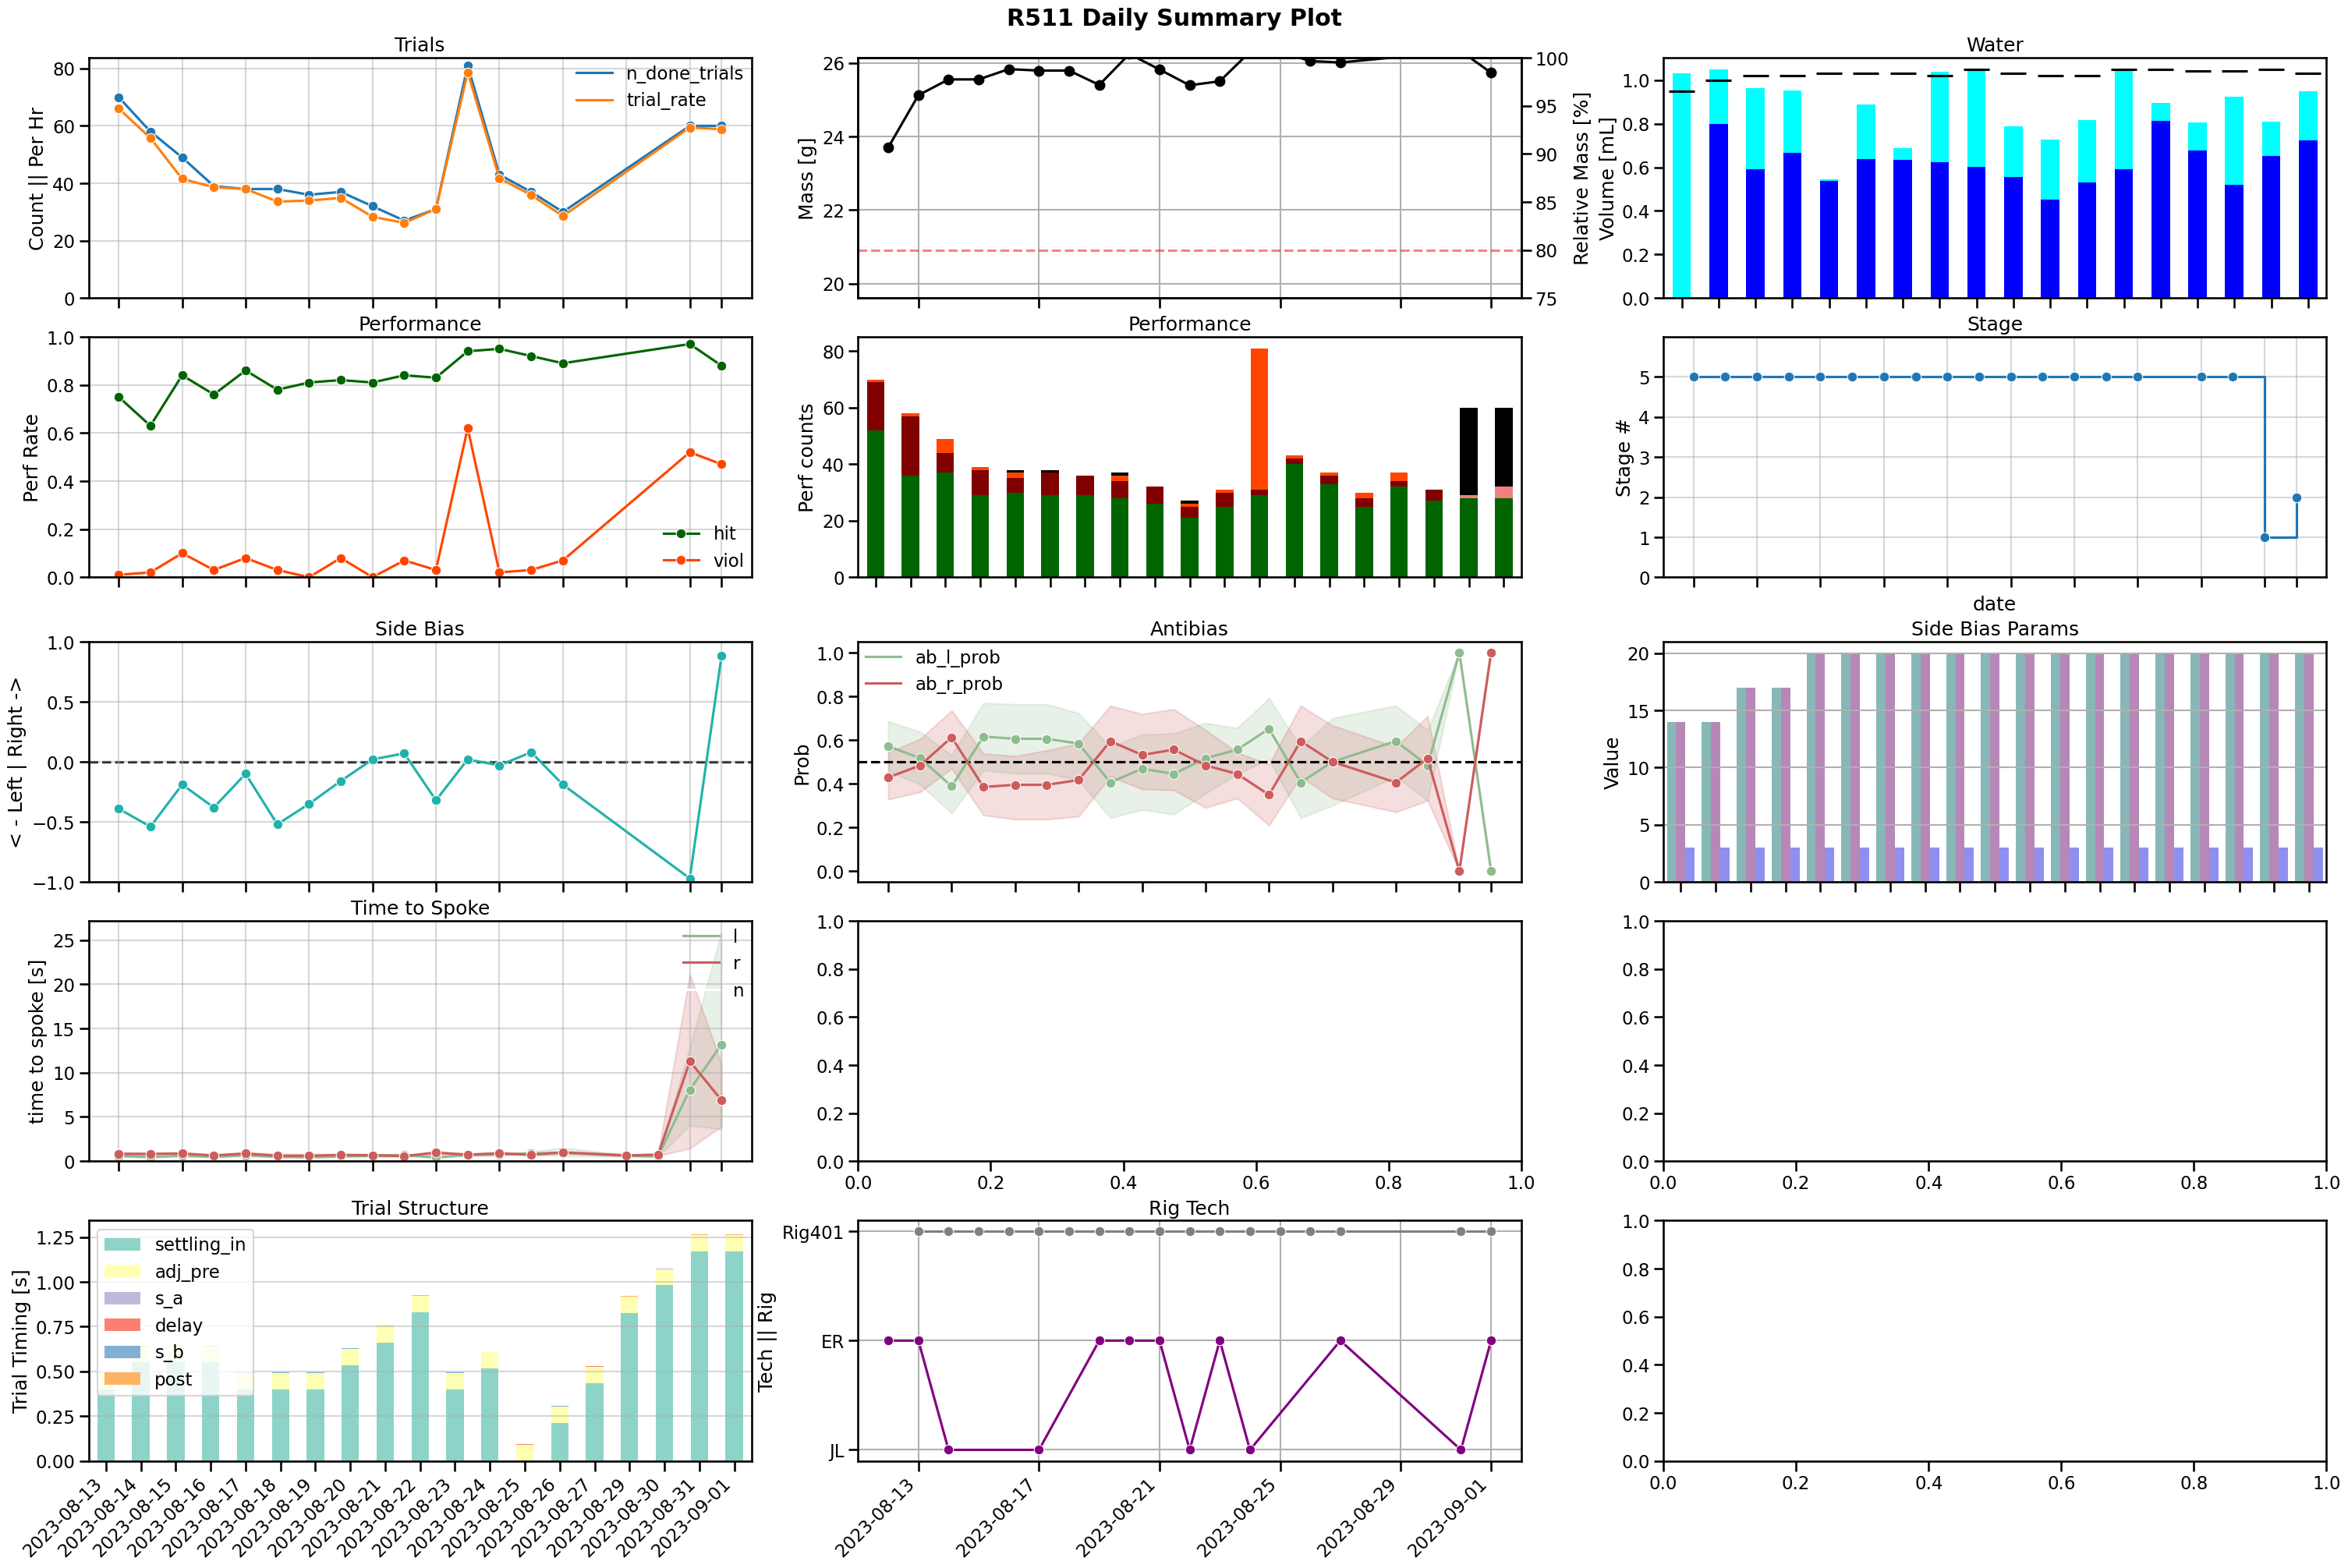

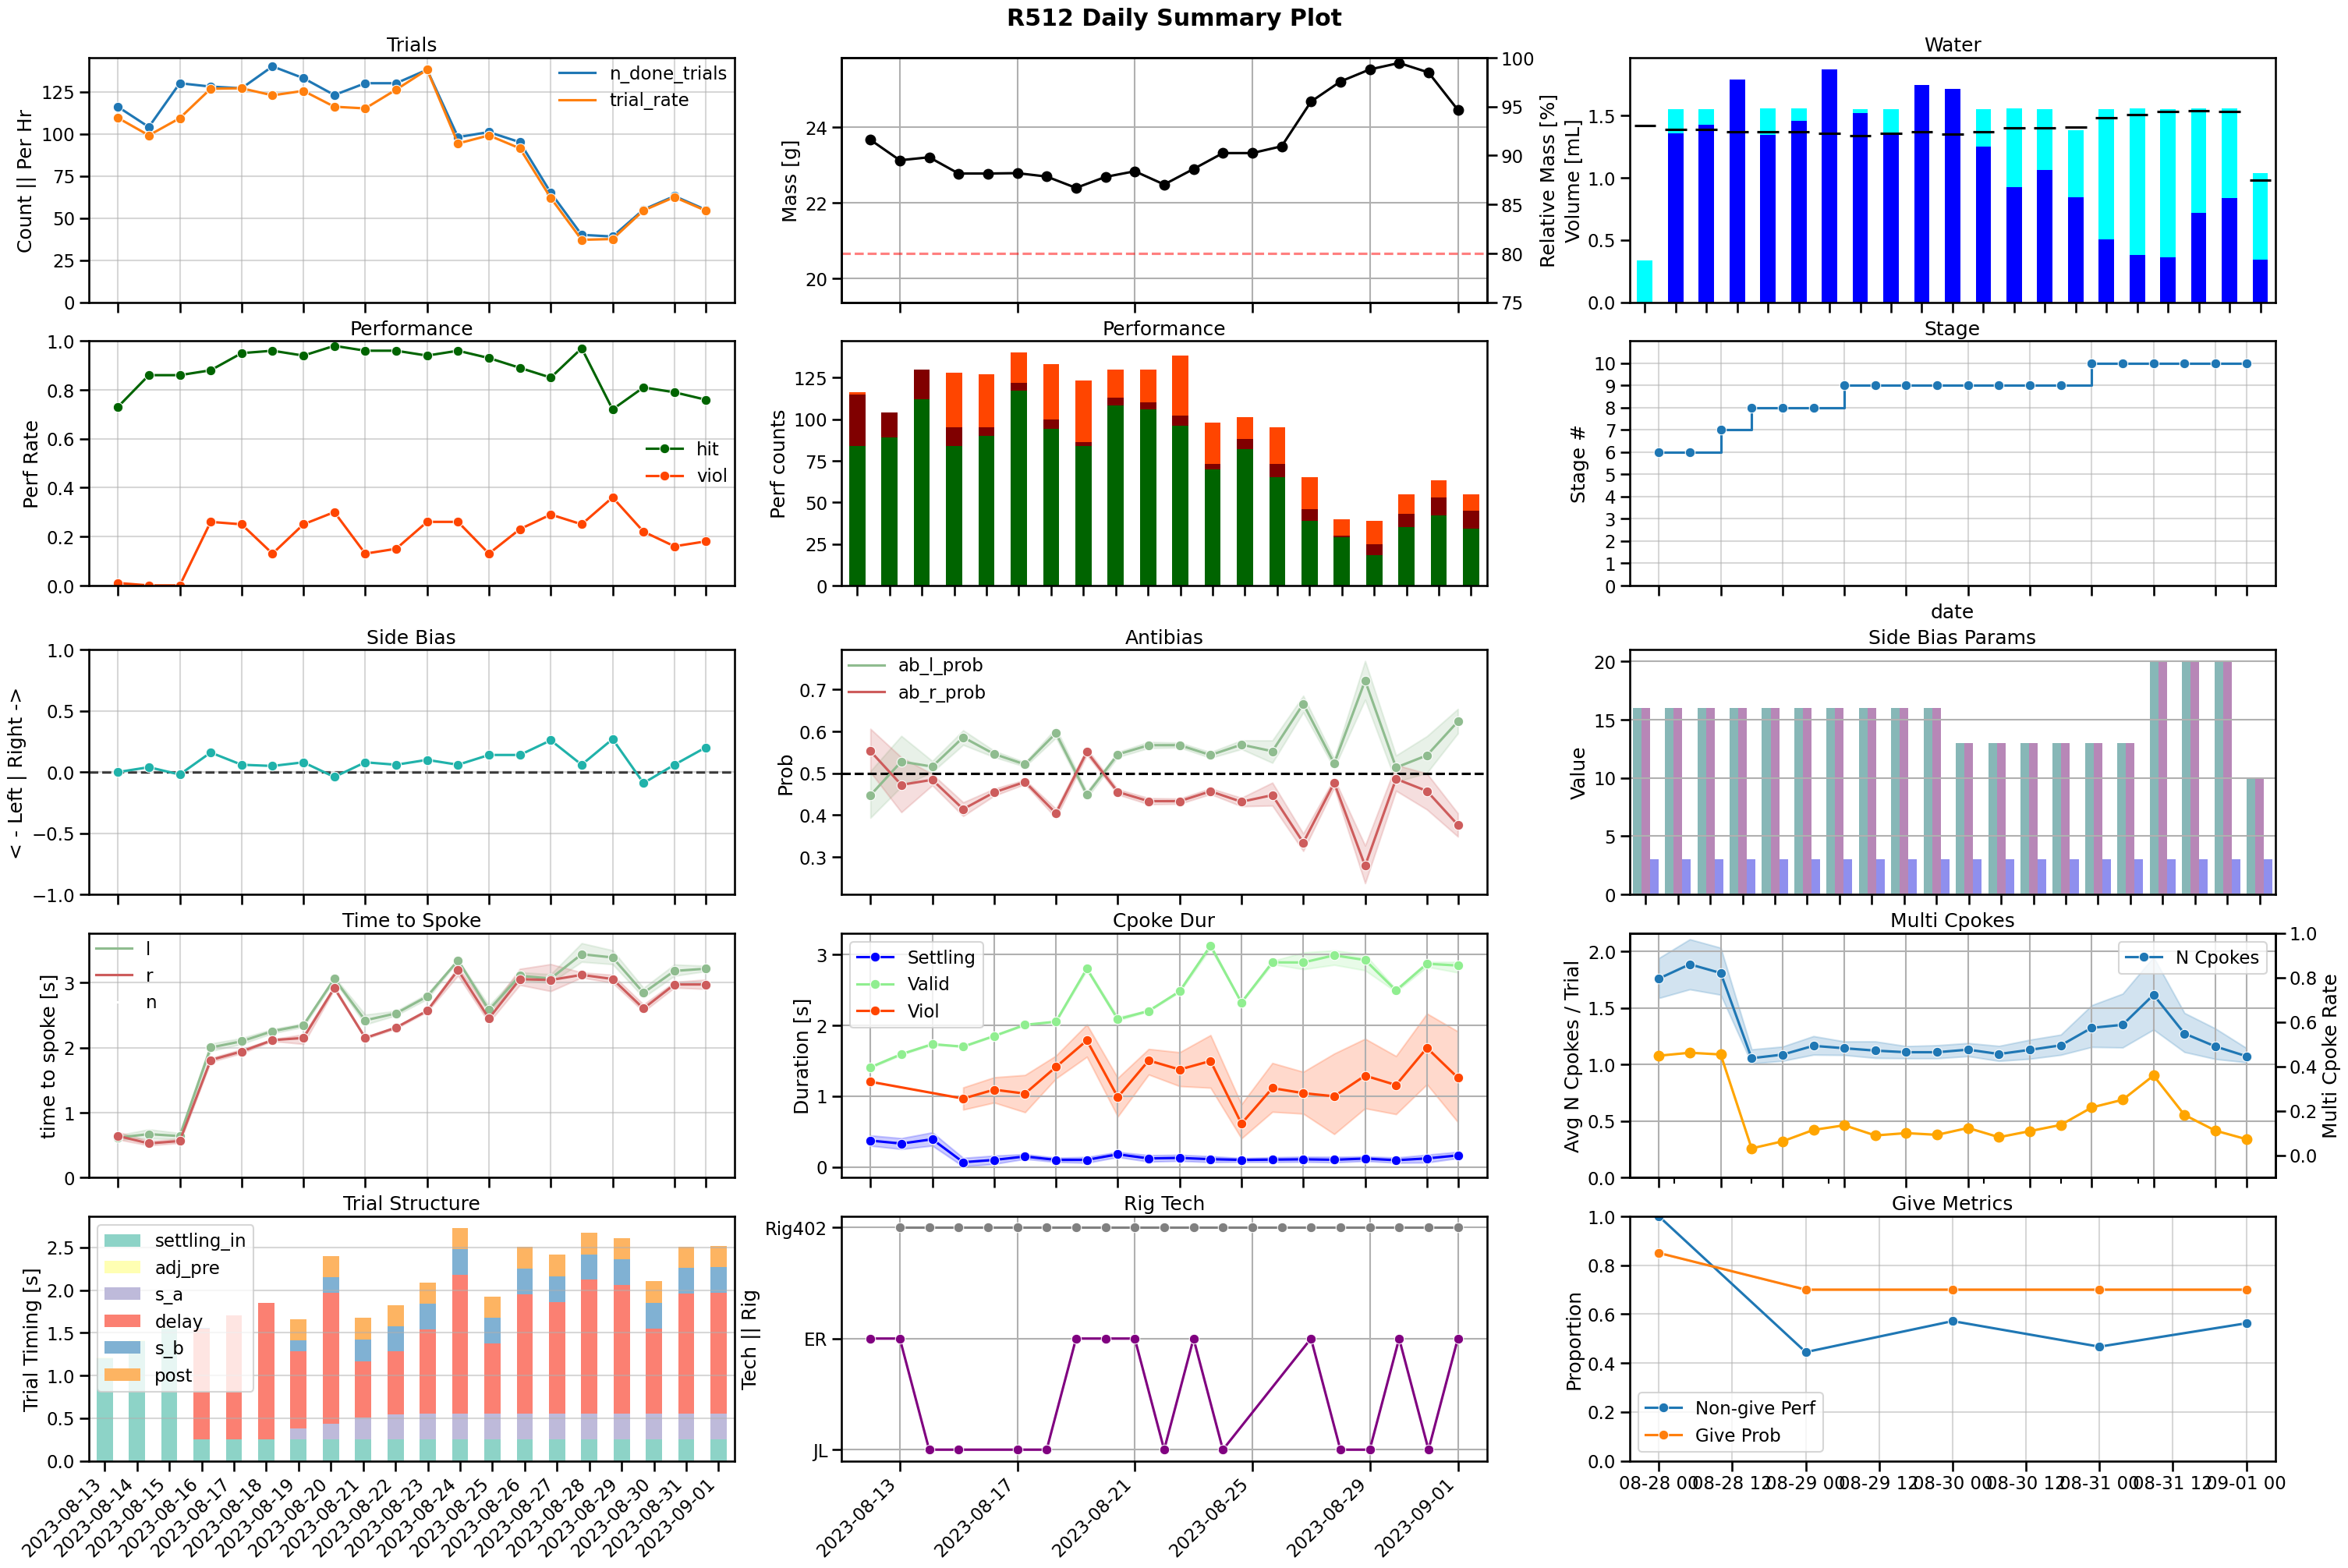

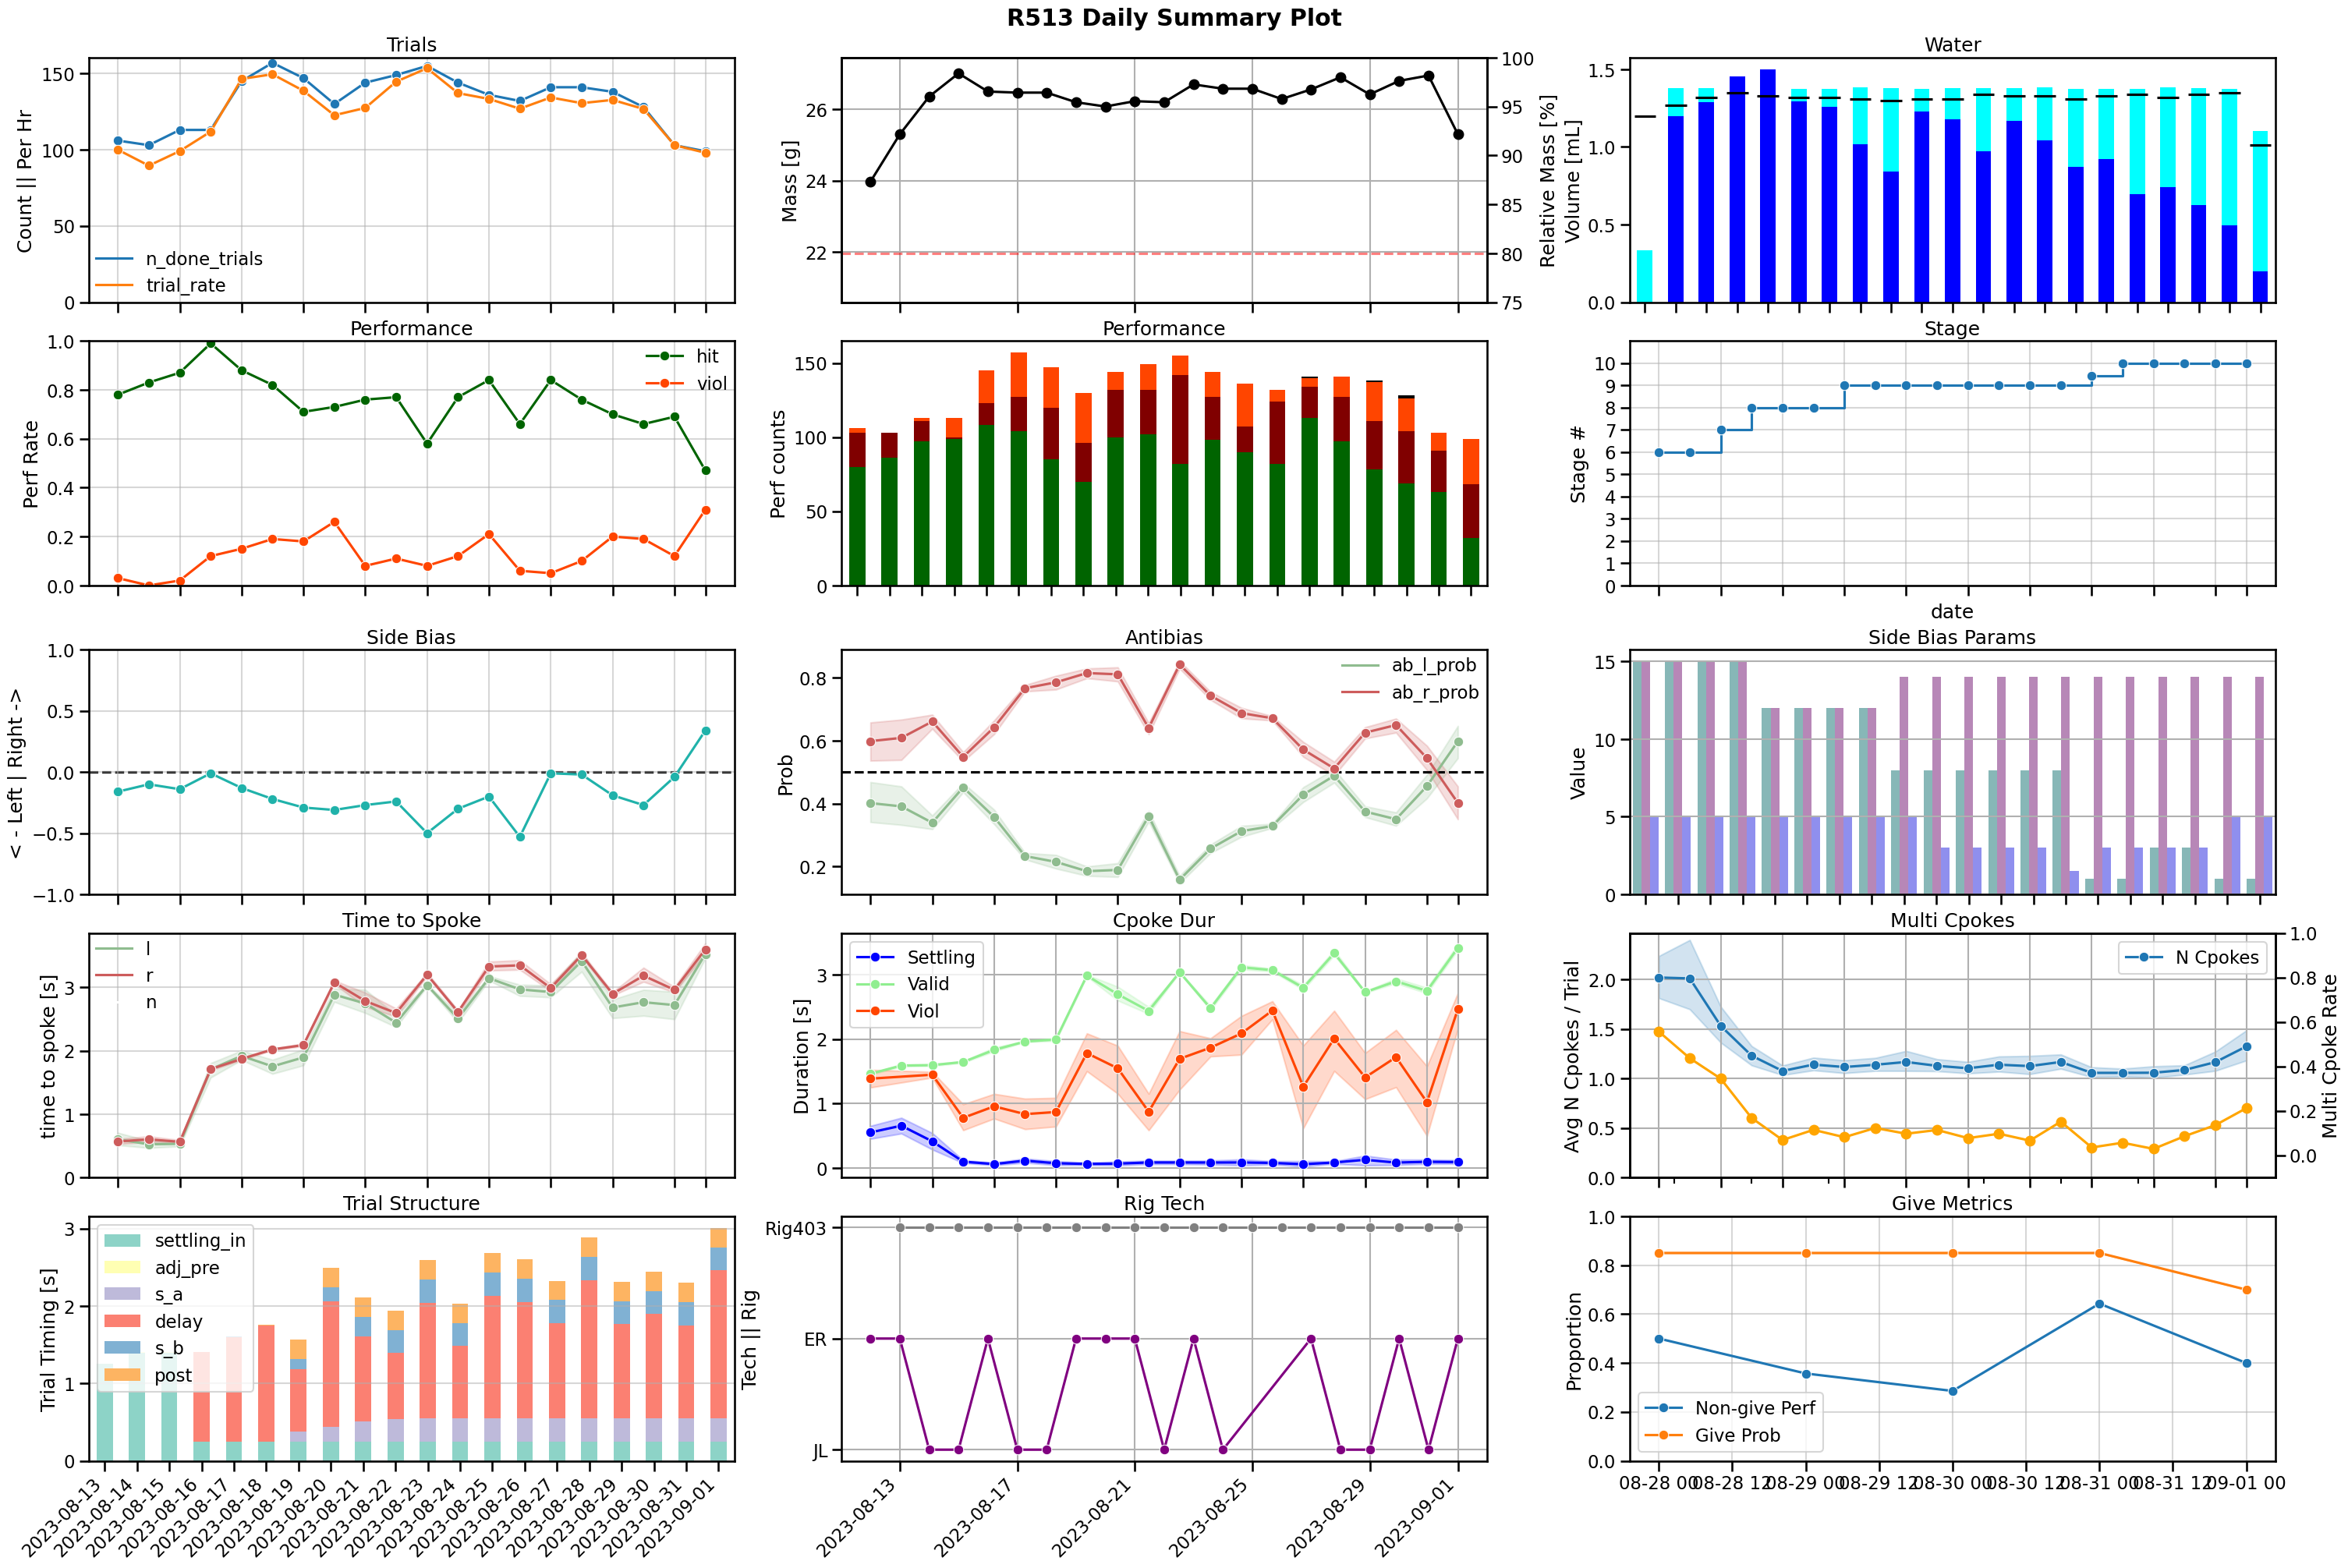

In [13]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    # if animal_id == "R511":
    #     continue
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)